## Lending Club (LC) Loan Data (2015 - 2018 Q2)

In [7]:
# Import standard libraries needed for data exploration 
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import OrderedDict

### Load Loan Data
Dataset available from: https://www.lendingclub.com/info/download-data.action
We have only used data from 2015 - 2018

In [21]:
# Read in raw data 
# 2015
data_2015 = pd.read_csv('./data/LoanStats_2015.csv', skiprows = [0])
# 2016
data_2016_Q1 = pd.read_csv('./data/LoanStats_2016Q1.csv', skiprows = [0])
data_2016_Q2 = pd.read_csv('./data/LoanStats_2016Q2.csv', skiprows = [0])
data_2016_Q3 = pd.read_csv('./data/LoanStats_2016Q3.csv', skiprows = [0])
data_2016_Q4 = pd.read_csv('./data/LoanStats_2016Q4.csv', skiprows = [0])
# 2017
data_2017_Q1 = pd.read_csv('./data/LoanStats_2017Q1.csv', skiprows = [0])
data_2017_Q2 = pd.read_csv('./data/LoanStats_2017Q2.csv', skiprows = [0])
data_2017_Q3 = pd.read_csv('./data/LoanStats_2017Q3.csv', skiprows = [0])
data_2017_Q4 = pd.read_csv('./data/LoanStats_2017Q4.csv', skiprows = [0])
# 2018
data_2018_Q1 = pd.read_csv('./data/LoanStats_2018Q1.csv', skiprows = [0])
data_2018_Q2 = pd.read_csv('./data/LoanStats_2018Q2.csv', skiprows = [0])

In [22]:
# Merge quarter data to year
data_2016 = pd.concat(objs = [data_2016_Q1,data_2016_Q2,data_2016_Q3,data_2016_Q4], axis = 0)
data_2017 = pd.concat(objs = [data_2017_Q1,data_2017_Q2,data_2017_Q3,data_2017_Q4], axis = 0)
data_2018 = pd.concat(objs = [data_2018_Q1,data_2018_Q2],axis = 0)

In [27]:
# Get shape of loan data
print('Data shape for 2015 - 2018')
print('2015', data_2015.shape)
print('2016', data_2016.shape)
print('2017', data_2017.shape)
print('2018', data_2018.shape)

Data shape for 2015 - 2018
2015 (421097, 145)
2016 (434415, 145)
2017 (443587, 145)
2018 (238640, 145)


In [29]:
# Add year information before merging in all data
data_2015['year'] = 2015
data_2016['year'] = 2016
data_2017['year'] = 2017
data_2018['year'] = 2018

In [31]:
# Merge all the data together 
data = pd.concat(objs = [data_2015,data_2016, data_2017, data_2018],axis = 0)

In [33]:
print('Total number of loans transactions in database: {0}'.format(data.shape[0]))
print('Number of features: {0}'.format(data.shape[1]))

Total number of loans transactions in database: 1537739
Number of features: 146


There are >1.5 M loan transactions taken place from 2015 - 2018Q2, ad we have 146 features collected for each transaction

In [34]:
# Sample of data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year
0,NaN,NaN,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
1,NaN,NaN,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.78%,391.62,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
3,NaN,NaN,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015
4,NaN,NaN,11550.0,11550.0,11550.0,60 months,16.59%,284.51,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015


## Data Clean-up

### 1. Drop features with excessive missing values

In [55]:
# We will drop all features which have large amount of missing value
missing = data.isnull().sum()
missing_ratio = missing / len(data)
missing_ratio = pd.DataFrame({'features':missing_ratio.index,'missing_ratio':missing_ratio.values})

# Show all features which have missing data greater than the threshold value
threshold = 0.3 # >30% of the data is missing
missing_ratio.sort_values(by='missing_ratio', ascending=False)
missing_ratio[missing_ratio['missing_ratio'] > threshold]

,features,missing_ratio
0,id,0.999986
1,member_id,1.000000
18,url,1.000000
19,desc,0.999956
28,mths_since_last_delinq,0.497197
29,mths_since_last_record,0.827441
47,next_pymnt_d,0.444317
50,mths_since_last_major_derog,0.725070
53,annual_inc_joint,0.943981
54,dti_joint,0.943983


In [62]:
features_to_drop =  list(missing_ratio[missing_ratio['missing_ratio'] > threshold]['features'])

There are 45 features which have more than 30% of the values missing and we will drop them from the dataset

In [66]:
# Drop features with more than 30% missing data
data = data.drop(labels = features_to_drop, axis = 1)

In [67]:
# Save intermediate data to disk
data.to_csv('./data/data_2015_2018.csv', index = False)

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,year
0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,...,0.0,0.0,304003.0,74920.0,41500.0,42503.0,N,Cash,N,2015
1,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,...,0.0,0.0,139633.0,133285.0,12600.0,127033.0,N,Cash,N,2015
2,12000.0,12000.0,12000.0,36 months,10.78%,391.62,B,B4,Salesman,3 years,...,0.0,0.0,59420.0,31915.0,21200.0,32820.0,N,Cash,N,2015
3,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,Aviation Safety Inspector,8 years,...,0.0,0.0,92909.0,42952.0,33200.0,37909.0,N,Cash,N,2015
4,11550.0,11550.0,11550.0,60 months,16.59%,284.51,D,D2,general manager,5 years,...,0.0,0.0,34105.0,10353.0,12300.0,16005.0,N,Cash,N,2015


After droping 45 features the intermediate data consist of 1.5M data points each with 101 features.

### 2. Drop features collected after loan is issued

In [73]:
features_collected = ['funded_amnt', 'funded_amnt_inv', 'issue_d', 'pymnt_plan', 'out_prncp', 
                'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                'policy_code', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
                'last_credit_pull_d', 'hardship_flag', 'disbursement_method', 
                'debt_settlement_flag']
data = data.drop(labels=features_collected, axis=1)

data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537739 entries, 0 to 130773
Columns: 81 entries, loan_amnt to year
dtypes: float64(63), int64(1), object(17)
memory usage: 1002.0+ MB


### 3. Encode loan status to paid / default

The loan status data is divided into number of categories, for our current purpose we are only interested in predicting if the loan will be paid back or not.  

In [78]:
# only keep the data that we are certainty about their final status
loan_status = ['Fully Paid', 'Current', 'Charged Off', 'Late (16-30 days)','Late (31-120 days)', 'In Grace Period', 'Default']
data = data[data['loan_status'].isin(loan_status)]

In [91]:
# Helper function for encoding categorical variables
def encode(variable, db, levels):
    # Encode levels as integers
    for key in levels.keys():
        indx = (db[variable] == key)
        db[variable][indx] = levels[key]

In [88]:
df = data['loan_status']
df = df.to_frame()

In [92]:
# Encode loan status
loan_status_levels = {
    'Fully Paid':0,
    'Current':1,
    'Charged Off':2,
    'Late (16-30 days)':3,
    'Late (31-120 days)':4,
    'In Grace Period':5, 
    'Default':6
    
}
encode('loan_status', df, loan_status_levels)

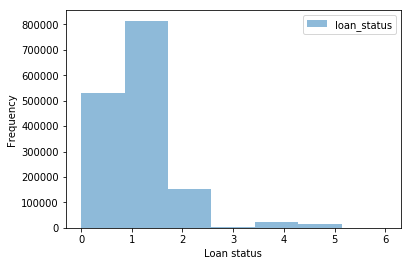

In [97]:
# Distribution of loan status
df.plot.hist(bins = 7, alpha = 0.5)
plt.xlabel('Loan status')
plt.ylabel('Frequency');

For our current work we are going to assume that loans which are **Fully Paid** or **Current** are in good standing and have a high probability of being paid off. The rest of loan category have a high chance of defaulting and will be encoded as defaulting.

In [99]:
# Encode loan status
loan_status_levels = {
    'Fully Paid':0,
    'Current':0,
    'Charged Off':1,
    'Late (16-30 days)':1,
    'Late (31-120 days)':1,
    'In Grace Period':1, 
    'Default':1
    
}
encode('loan_status', data, loan_status_levels)

In [101]:
# Save intermediate data to disk
data.to_csv('./data/data_2015_2018.csv', index = False)

data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,year
0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,...,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0,2015
1,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,RENT,44000.0,...,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,2015
2,12000.0,36 months,10.78%,391.62,B,B4,Salesman,3 years,RENT,40000.0,...,2.0,90.5,20.0,0.0,0.0,59420.0,31915.0,21200.0,32820.0,2015
3,33600.0,36 months,10.78%,1096.53,B,B4,Aviation Safety Inspector,8 years,RENT,104000.0,...,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0,2015
4,11550.0,60 months,16.59%,284.51,D,D2,general manager,5 years,RENT,38000.0,...,2.0,100.0,60.0,0.0,0.0,34105.0,10353.0,12300.0,16005.0,2015
